# Introduction to Sampling

In [1]:
# import os for operating system dependent functionalities
import os

# import other required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# change your working folder where you have stored the dataset
os.chdir(".../Chapter 4")
os.getcwd()

In [3]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_housingdata = pd.read_csv("Final_HousePrices.csv")

In [4]:
df_housingdata.shape

(1460, 80)

In [5]:
df_housingdata.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [6]:
# create feature & response variables
X = df_housingdata.iloc[:,0:79]
Y = df_housingdata['SalePrice']

# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1021, 79)
(1021,)
(438, 79)
(438,)


#### Sampling a dataset with categorical response variable

In [11]:
df_creditcarddata = pd.read_csv("creditcarddefault.csv")
df_creditcarddata.shape

(30000, 25)

In [12]:
# create feature & response variables
X = df_creditcarddata.iloc[:,0:24]
Y = df_creditcarddata['default payment next month']

# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, stratify=Y)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21000, 24)
(21000,)
(9000, 24)
(9000,)


In [14]:
print(pd.value_counts(Y_train.values))
print(pd.value_counts(Y_test.values))

print(pd.value_counts(Y_train.values)*100/Y_train.shape)
print(pd.value_counts(Y_test.values)*100/Y_test.shape)

0    16355
1     4645
dtype: int64
0    7009
1    1991
dtype: int64
0    77.880952
1    22.119048
dtype: float64
0    77.877778
1    22.122222
dtype: float64


# Cross-Validation

In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")

In [17]:
df_autodata.shape

(398, 9)

In [18]:
df_autodata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
carname          object
dtype: object

In [19]:
df_autodata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

In [20]:
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)

In [21]:
df_autodata.drop(['carname'], axis=1, inplace=True)

In [22]:
# create feature & response variables
X = df_autodata.iloc[:,1:8]
Y = df_autodata.iloc[:,0]
X=np.array(X)
Y=np.array(Y)

In [23]:
# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1)

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(278, 7)
(278,)
(120, 7)
(120,)


In [25]:
# fit a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train, Y_train)
predictedvalues = lm.predict(X_test)

In [26]:
r2score = r2_score(Y_test, predictedvalues)
mse = mean_squared_error(Y_test, predictedvalues)
        
print("Results without Cross-Validation:")
print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))

Results without Cross-Validation:
R^2: 0.85, MSE: 8.93


Text(0,0.5,'Predicted mpg')

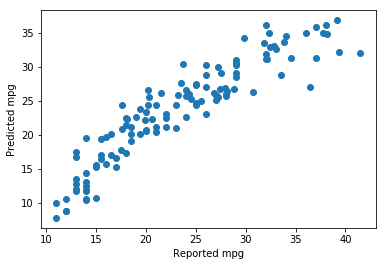

In [27]:
## Let us plot the model
plt.scatter(Y_test, predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

### 1. K-Fold Cross-Validation

In [28]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 

In [29]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)
df_autodata.drop(['carname'], axis=1, inplace=True)
X = df_autodata.iloc[:,1:8]
Y = df_autodata.iloc[:,0]
X=np.array(X)
Y=np.array(Y)

In [30]:
kfoldcv = KFold(n_splits=10)
kf_ytests = []
kf_predictedvalues = []

for train_index, test_index in kfoldcv.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train) 
    Y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the kfoldcv.split, 
    # so we append them to the respective lists.
        
    kf_ytests += list(Y_test)
    kf_predictedvalues += list(Y_pred)

        
r2score = r2_score(kf_ytests, kf_predictedvalues)
mse = mean_squared_error(kf_ytests, kf_predictedvalues)
        
print("K-Fold Cross Validation Results:")
print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))

K-Fold Cross Validation Results:
R^2: 0.79, MSE: 12.85


Text(0,0.5,'Predicted mpg')

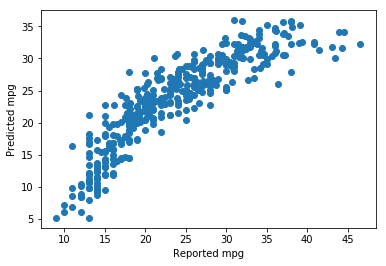

In [31]:
## Let us plot the model
plt.scatter(kf_ytests, kf_predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

### 2. LOOCV

In [32]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)
df_autodata.drop(['carname'], axis=1, inplace=True)
X = df_autodata.iloc[:,1:8]
Y = df_autodata.iloc[:,0]
X=np.array(X)
Y=np.array(Y)

In [33]:
from sklearn.model_selection import LeaveOneOut 
loocv = LeaveOneOut()

loo_ytests = []
loo_predictedvalues = []

for train_index, test_index in loocv.split(X):
    # the below requires arrays. So we converted the dataframes to arrays
    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train) 
    Y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so we append them to the respective lists.
        
    loo_ytests += list(Y_test)
    loo_predictedvalues += list(Y_pred)
    
r2score = r2_score(loo_ytests, loo_predictedvalues)
mse = mean_squared_error(loo_ytests, loo_predictedvalues)
        
print("LOOCV Cross Validation Results:")
print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))

LOOCV Cross Validation Results:
R^2: 0.81, MSE: 11.43


Text(0,0.5,'Predicted mpg')

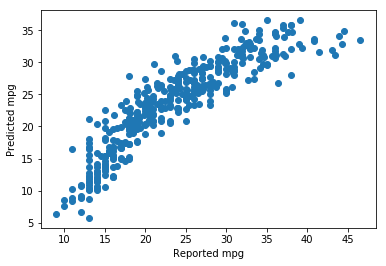

In [34]:
## Let us plot the model
plt.scatter(loo_ytests, loo_predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')

# Bootstrap

### Using resample() scikit-learn function

In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [36]:
# Let's read our data. We prefix the data frame name with "df_" for easier understanding.
df_autodata = pd.read_csv("autompg.csv")
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(), inplace=True)
df_autodata.drop(['carname'], axis=1, inplace=True)

In [37]:
df_autodata.shape

(398, 8)

In [38]:
def create_bootstrap_oob(df):
    global df_OOB
    global df_bootstrap_sample  
    
    # creating the bootstrap sample
    df_bootstrap_sample = resample(df, replace=True, n_samples=100)
    
    # creating the OOB sample    
    bootstrap_sample_index = tuple(df_bootstrap_sample.index)
    bootstrap_df = df.index.isin(bootstrap_sample_index)
    df_OOB = df[~bootstrap_df]

In [39]:
iteration=50
bootstap_statistics=list()
originalsample_statistics=list()

for i in range(iteration):
    # call custom function create_bootstrap_oob(). Pass df_autodata
    create_bootstrap_oob(df_autodata)
    
    # capture mean value of mpg variable for all bootstrap samples
    bootstap_statistics.append(df_bootstrap_sample.iloc[:,0].mean())
    
    originalsample_statistics.append(df_autodata['mpg'].mean())

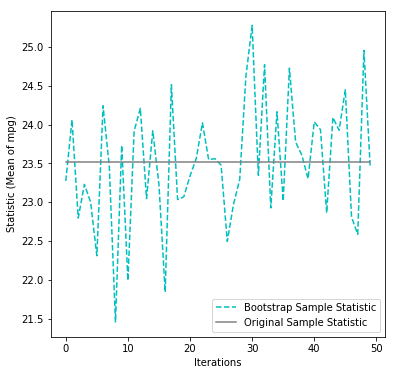

In [40]:
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize=(6,6))

plt.plot(bootstap_statistics, 'c--', label='Bootstrap Sample Statistic')
plt.plot(originalsample_statistics, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend(loc=4)
plt.show()

## Mean Squared Error for Each Bootstrap Iteration

In [47]:
iteration=50
mse_each_iterations = list()
lm=SGDRegressor()
total_mse=0
average_mse= list()

for i in range(iteration):
    create_bootstrap_oob(df_autodata)
    X_BS = df_bootstrap_sample.iloc[:,1:8] #Bootstrap sample features
    Y_BS = df_bootstrap_sample.iloc[:,0] #Bootstrap sample response variable

    X_OOB = df_OOB.iloc[:,1:8] #OOB sample features
    Y_OOB = df_OOB.iloc[:,0] #OOB sample response variable    
    
    # fit your model with bootstrap sample
    lm=SGDRegressor()
    lm.fit(X_BS, Y_BS)
    
    # test your model on out-of-bag sample 
    predictedvalues = lm.predict(X_OOB)
    
    # capture MSE for the predicted values against OOB actuals
    mse = mean_squared_error(Y_OOB, predictedvalues)
    
    # create a list of mse values
    mse_each_iterations.append(mse) 

    # add all mse for calculating average
    total_mse += mse
    average_mse.append(total_mse/i)


/Users/Dippies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Dippies/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


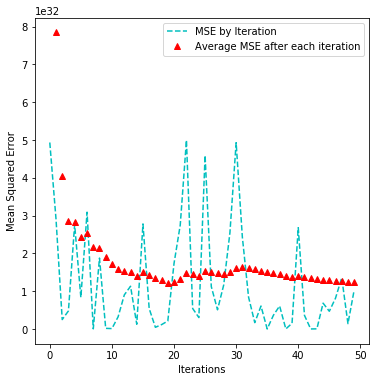

In [48]:
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize=(6,6))

plt.plot(mse_each_iterations, 'c--', label='MSE by Iteration')
plt.plot(average_mse, 'r^', label='Average MSE after each iteration')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend(loc=1)
plt.show()